In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib.ticker import FuncFormatter

In [27]:
###Copy this for other files for full database combined
df06 = pd.read_csv("./Data/RB Research Data - 2006-2007.csv")
df07 = pd.read_csv("./Data/RB Research Data - 2007-2008.csv")
df08 = pd.read_csv("./Data/RB Research Data - 2008-2009.csv")
df09 = pd.read_csv("./Data/RB Research Data - 2009-2010.csv")
df10 = pd.read_csv("./Data/RB Research Data - 2010-2011.csv")
df11 = pd.read_csv("./Data/RB Research Data - 2011-2012.csv")
df12 = pd.read_csv("./Data/RB Research Data - 2012-2013.csv")
df13 = pd.read_csv("./Data/RB Research Data - 2013-2014.csv")
df14 = pd.read_csv("./Data/RB Research Data - 2014-2015.csv")
df15 = pd.read_csv("./Data/RB Research Data - 2015-2016.csv")
df16 = pd.read_csv("./Data/RB Research Data - 2016-2017.csv")
df17 = pd.read_csv("./Data/RB Research Data - 2017-2018.csv")
df18 = pd.read_csv("./Data/RB Research Data - 2018-2019.csv")
df19 = pd.read_csv("./Data/RB Research Data - 2019-2020.csv")
df20 = pd.read_csv("./Data/RB Research Data - 2020-2021.csv")
df21 = pd.read_csv("./Data/RB Research Data - 2021-2022.csv")
df22 = pd.read_csv("./Data/RB Research Data - 2022-2023.csv")
df = pd.concat([df06, df07, df08, df09, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20, df21, df22])
#df

In [28]:
pd.set_option('display.max_columns', None)

In [29]:
superbowlWinningTeamSeasonLeadRushers = ['Joseph Addai', 'Brandon Jacobs', 'Willie Parker', 'Pierre Thomas', 'Brandon Jackson', 'Ahmad Bradshaw', 'Ray Rice', 'Marshawn Lynch', 'Jonas Gray', 'Ronnie Hillman', 'LeGarrette Blount', 'LeGarrette Blount', 'Sony Michel', 'Damien Williams', 'Ronald Jones II', 'Sony Michel', 'Isiah Pacheco']

In [30]:
superbowlWinningTeamGameLeadRushers = ['Dominic Rhodes', 'Ahmad Bradshaw', 'Willie Parker', 'Pierre Thomas', 'James Starks', 'Ahmad Bradshaw', 'Ray Rice', 'Percy Harvin', 'LeGarrette Blount', 'C.J. Anderson', 'LeGarrette Blount', 'LeGarrette Blount', 'Sony Michel', 'Damien Williams', 'Leonard Fournette', 'Cam Akers', 'Isiah Pacheco']

In [31]:
superbowlWinningTeamSeasonNotGameLeadRushers = ['Joseph Addai', 'Brandon Jacobs', 'Brandon Jackson', 'Marshawn Lynch', 'Jonas Gray', 'Ronnie Hillman', 'Ronald Jones II', 'Sony Michel', 'Isiah Pacheco']

In [32]:
superbowlWinningTeamGameNotSeasonLeadRushers = ['Dominic Rhodes', 'Ahmad Bradshaw', 'James Starks', 'Percy Harvin', 'LeGarrette Blount', 'C.J. Anderson', 'Leonard Fournette', 'Cam Akers']

In [33]:
years = list(range(2006, 2023))
year_player_season_array = list(zip(years, superbowlWinningTeamSeasonLeadRushers))
years = list(range(2006, 2023))
year_player_game_array = list(zip(years, superbowlWinningTeamGameLeadRushers))
years = [2006, 2007, 2010, 2013, 2014, 2015, 2020, 2021, 2022]
year_player_season_not_game_array = list(zip(years, superbowlWinningTeamSeasonNotGameLeadRushers))
years = [2008, 2009, 2011, 2012, 2016, 2017, 2018, 2019]
year_player_game_not_season_array = list(zip(years, superbowlWinningTeamGameNotSeasonLeadRushers))

In [34]:
willie_p = [("Willie Parker","PIT",2008,"N",4,16600000,4150000,116000000,0.03577586207,14,500,474,18,8,6,61,280,1037,3.7,7,723,1,24,12,5,9,1.8,0,4.4,1046,1690,4991,35,0.6136094675,0.209577239,0.2,5917900,23671600,165416000)]
willie_p_df = pd.DataFrame(willie_p, columns=['Player Name', 'Team', 'Year', 'Rookie Contract (Y/N)', 'Contract Length', 'Total Pay', 'Yearly Pay (AAV)', 'Team Payroll', 'Player Percentage of Payroll', 'Games Played', 'Snaps Played', 'Backfield Snaps', 'Slot Snaps', 'Wide snaps', 'QB Pressure Allowed (PR)', 'Total Pressure Oppurtnuties (OPP)', 'Rush Attempts', 'Rush Yards', 'Rush YPA', 'Rush TDs', 'Rush Yac (YCO)', 'Fumbles', 'Explosive Runs (10+)', 'Recieving Targets', 'Recieving Receptions', 'Recieving Yards', 'Y/Rec', 'Receiving TDs', 'YAC/REC', 'All-Purpose Yards', 'Team Rushing Yards', 'Team Total Yards', 'Team Total Touchdowns', 'Player Percentage of Rushing Yards', 'Player Percentage of Offensive Yards', 'Player Percentage of Touchdowns', 'AAV Adjusted', 'Total Pay Adjusted', 'Payroll Adjusted'])


In [35]:
# Convert the list to a DataFrame
SBRBS = pd.DataFrame(year_player_season_array, columns=['Year', 'Player Name'])

# Filtering the larger DataFrame based on the provided list
SBRBS = df[df.apply(lambda x: (x['Year'], x['Player Name']) in year_player_season_array, axis=1)]

SBRBS = SBRBS.append(willie_p_df, ignore_index=True)
SBRBS

/var/folders/zc/n8dyggt93h784s7pmvk0hqjr0000gn/T/ipykernel_19873/1539974352.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SBRBS = SBRBS.append(willie_p_df, ignore_index=True)


,Player Name,Team,Year,Rookie Contract (Y/N),Contract Length,Total Pay,Yearly Pay (AAV),Team Payroll,Player Percentage of Payroll,Games Played,Snaps Played,Backfield Snaps,Slot Snaps,Wide snaps,QB Pressure Allowed (PR),Total Pressure Oppurtnuties (OPP),Rush Attempts,Rush Yards,Rush YPA,Rush TDs,Rush Yac (YCO),Fumbles,Explosive Runs (10+),Recieving Targets,Recieving Receptions,Recieving Yards,Y/Rec,Receiving TDs,YAC/REC,All-Purpose Yards,Team Rushing Yards,Team Total Yards,Team Total Touchdowns,Player Percentage of Rushing Yards,Player Percentage of Offensive Yards,Player Percentage of Touchdowns,AAV Adjusted,Total Pay Adjusted,Payroll Adjusted,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 0
0,Joseph Addai,IND,2006.0,Y,5.0,10665000.0,2.133000e+06,102000000.0,0.020912,20.0,787.0,785.0,1.0,1.0,8.0,113.0,303.0,1370.0,4.521452,9.0,798.0,3.0,41.0,70.0,62.0,443.0,7.145161,1.0,6.6,1813.0,1762.0,6070.0,48.0,0.777526,0.298682,0.208333,3.248559e+06,1.624280e+07,155346000.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Brandon Jacobs,NYG,2007.0,Y,4.0,1840000.0,4.600000e+05,109000000.0,0.004220,15.0,627.0,617.0,5.0,5.0,11.0,132.0,264.0,1209.0,4.579545,7.0,653.0,7.0,28.0,40.0,27.0,203.0,7.518519,3.0,8.7,1412.0,2148.0,5302.0,38.0,0.562849,0.266315,0.263158,6.812600e+05,2.725040e+06,161429000.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Pierre Thomas,NO,2009.0,Y,3.0,1120000.0,3.733333e+05,123000000.0,0.003035,17.0,458.0,447.0,2.0,9.0,5.0,27.0,183.0,936.0,5.100000,7.0,531.0,3.0,22.0,55.0,51.0,413.0,8.100000,4.0,10.1,1349.0,2106.0,6461.0,55.0,0.444444,0.208791,0.200000,5.342400e+05,1.602720e+06,176013000.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Brandon Jackson,GB,2010.0,Y,4.0,2805000.0,7.012500e+05,0.0,0.000000,20.0,621.0,609.0,3.0,8.0,3.0,114.0,196.0,731.0,3.729592,3.0,525.0,2.0,18.0,57.0,48.0,406.0,8.458333,2.0,9.2,1137.0,1606.0,5730.0,42.0,0.455168,0.198429,0.119048,9.873600e+05,3.949440e+06,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Ahmad Bradshaw,NYG,2011.0,N,4.0,18000000.0,4.500000e+06,119706771.0,0.037592,16.0,655.0,644.0,1.0,10.0,5.0,132.0,234.0,931.0,3.978632,10.0,623.0,3.0,20.0,61.0,50.0,381.0,7.620000,2.0,8.2,1312.0,1427.0,6161.0,46.0,0.652418,0.212952,0.260870,6.142500e+06,2.457000e+07,163399742.4,NaN,NaN,NaN,NaN,NaN,NaN
5,Ray Rice,BAL,2012.0,N,1.0,7700000.0,7.700000e+06,129851198.0,0.059299,20.0,1012.0,960.0,18.0,31.0,12.0,173.0,341.0,1451.0,4.255132,11.0,768.0,5.0,31.0,69.0,92.0,566.0,6.152174,1.0,8.9,2017.0,1901.0,5640.0,39.0,0.763282,0.357624,0.307692,1.029490e+07,1.029490e+07,173611051.7,NaN,NaN,NaN,NaN,NaN,NaN
6,Marshawn Lynch,SEA,2013.0,N,4.0,30000000.0,7.500000e+06,133725553.0,0.056085,19.0,858.0,817.0,7.0,33.0,4.0,90.0,366.0,1550.0,4.234973,16.0,956.0,5.0,43.0,46.0,37.0,319.0,8.621622,2.0,7.8,1869.0,2188.0,5424.0,41.0,0.708410,0.344580,0.439024,9.885000e+06,3.954000e+07,176250278.9,NaN,NaN,NaN,NaN,NaN,NaN
7,Jonas Gray,NE,2014.0,N,2.0,930000.0,4.650000e+05,134321836.0,0.003462,9.0,215.0,164.0,0.0,1.0,0.0,21.0,93.0,416.0,4.500000,5.0,218.0,0.0,9.0,3.0,1.0,7.0,7.000000,0.0,3.0,423.0,1727.0,5848.0,47.0,0.240880,0.072332,0.106383,6.031050e+05,1.206210e+06,174215421.3,NaN,NaN,NaN,NaN,NaN,NaN
8,Ronnie Hillman,DEN,2015.0,Y,4.0,3000832.0,7.502080e+05,145098899.0,0.005170,19.0,591.0,559.0,9.0,21.0,10.0,64.0,239.0,917.0,3.800000,7.0,513.0,2.0,23.0,36.0,25.0,118.0,4.700000,0.0,4.8,1035.0,1718.0,5688.0,32.0,0.533760,0.181962,0.218750,9.715194e+05,3.886077e+06,187903074.2,NaN,NaN,NaN,NaN,NaN,NaN
9,LeGarrette Blount,NE,2016.0,N,1.0,1000000.0,1.000000e+06,148847888.0,0.006718,19.0,602.0,597.0,2.0,3.0,4.0,52.0,334.0,1270.0,3.802395,19.0,831.0,3.0,31.0,8.0,8.0,46.0,5.750000,0.0,5.8,1316.0,1872.0,6180.0,51.0,0.678419,0.212945,0.372549,1.279000e+06,1.279000e+06,190376448.8,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
# Convert the list to a DataFrame
SBRBG = pd.DataFrame(year_player_game_array, columns=['Year', 'Player Name'])

# Filtering the larger DataFrame based on the provided list
SBRBG = df[df.apply(lambda x: (x['Year'], x['Player Name']) in year_player_game_array, axis=1)]

SBRBG = SBRBG.append(willie_p_df, ignore_index=True)
SBRBG

/var/folders/zc/n8dyggt93h784s7pmvk0hqjr0000gn/T/ipykernel_19873/830452574.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SBRBG = SBRBG.append(willie_p_df, ignore_index=True)


,Player Name,Team,Year,Rookie Contract (Y/N),Contract Length,Total Pay,Yearly Pay (AAV),Team Payroll,Player Percentage of Payroll,Games Played,Snaps Played,Backfield Snaps,Slot Snaps,Wide snaps,QB Pressure Allowed (PR),Total Pressure Oppurtnuties (OPP),Rush Attempts,Rush Yards,Rush YPA,Rush TDs,Rush Yac (YCO),Fumbles,Explosive Runs (10+),Recieving Targets,Recieving Receptions,Recieving Yards,Y/Rec,Receiving TDs,YAC/REC,All-Purpose Yards,Team Rushing Yards,Team Total Yards,Team Total Touchdowns,Player Percentage of Rushing Yards,Player Percentage of Offensive Yards,Player Percentage of Touchdowns,AAV Adjusted,Total Pay Adjusted,Payroll Adjusted,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 0
0,Pierre Thomas,NO,2009.0,Y,3.0,1120000.0,3.733333e+05,123000000.0,0.003035,17.0,458.0,447.0,2.0,9.0,5.0,27.0,183.0,936.0,5.100000,7.0,531.0,3.0,22.0,55.0,51.0,413.0,8.100000,4.0,10.1,1349.0,2106.0,6461.0,55.0,0.444444,0.208791,0.200000,5.342400e+05,1.602720e+06,176013000.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Ahmad Bradshaw,NYG,2011.0,N,4.0,18000000.0,4.500000e+06,119706771.0,0.037592,16.0,655.0,644.0,1.0,10.0,5.0,132.0,234.0,931.0,3.978632,10.0,623.0,3.0,20.0,61.0,50.0,381.0,7.620000,2.0,8.2,1312.0,1427.0,6161.0,46.0,0.652418,0.212952,0.260870,6.142500e+06,2.457000e+07,163399742.4,NaN,NaN,NaN,NaN,NaN,NaN
2,Ray Rice,BAL,2012.0,N,1.0,7700000.0,7.700000e+06,129851198.0,0.059299,20.0,1012.0,960.0,18.0,31.0,12.0,173.0,341.0,1451.0,4.255132,11.0,768.0,5.0,31.0,69.0,92.0,566.0,6.152174,1.0,8.9,2017.0,1901.0,5640.0,39.0,0.763282,0.357624,0.307692,1.029490e+07,1.029490e+07,173611051.7,NaN,NaN,NaN,NaN,NaN,NaN
3,LeGarrette Blount,NE,2016.0,N,1.0,1000000.0,1.000000e+06,148847888.0,0.006718,19.0,602.0,597.0,2.0,3.0,4.0,52.0,334.0,1270.0,3.802395,19.0,831.0,3.0,31.0,8.0,8.0,46.0,5.750000,0.0,5.8,1316.0,1872.0,6180.0,51.0,0.678419,0.212945,0.372549,1.279000e+06,1.279000e+06,190376448.8,NaN,NaN,NaN,NaN,NaN,NaN
4,LeGarrette Blount,PHI,2017.0,N,1.0,1250000.0,1.250000e+06,173790936.0,0.007193,19.0,407.0,401.0,2.0,4.0,4.0,44.0,202.0,896.0,4.435644,5.0,713.0,1.0,24.0,8.0,8.0,50.0,6.250000,1.0,5.6,946.0,2115.0,5852.0,47.0,0.423641,0.161654,0.127660,1.566250e+06,1.566250e+06,217760042.8,NaN,NaN,NaN,NaN,NaN,NaN
5,Sony Michel,NE,2018.0,Y,4.0,9626695.0,2.406674e+06,175832665.0,0.013687,16.0,439.0,414.0,0.0,3.0,3.0,20.0,280.0,1267.0,4.525000,12.0,742.0,1.0,36.0,14.0,8.0,59.0,7.375000,0.0,8.0,1326.0,2037.0,6295.0,50.0,0.621993,0.210643,0.240000,2.943362e+06,1.177345e+07,215043349.3,NaN,NaN,NaN,NaN,NaN,NaN
6,Damien Williams,KC,2019.0,N,2.0,5100000.0,2.550000e+06,166507002.0,0.015315,14.0,562.0,504.0,24.0,19.0,2.0,46.0,157.0,694.0,4.420382,9.0,507.0,2.0,10.0,52.0,41.0,307.0,7.487805,4.0,7.7,1001.0,1569.0,6067.0,48.0,0.442320,0.164991,0.270833,3.062550e+06,6.125100e+06,199974909.4,NaN,NaN,NaN,NaN,NaN,NaN
7,Isiah Pacheco,KC,2022.0,Y,4.0,3739108.0,9.347770e+05,205249141.0,0.004554,20.0,577.0,413.0,6.0,19.0,7.0,25.0,207.0,1027.0,4.961353,6.0,653.0,3.0,20.0,20.0,19.0,195.0,10.263158,0.0,13.6,1222.0,1970.0,7032.0,59.0,0.521320,0.173777,0.101695,9.805811e+05,3.922324e+06,215306348.9,NaN,NaN,NaN,NaN,NaN,NaN
8,Willie Parker,PIT,2008.0,N,4.0,16600000.0,4.150000e+06,116000000.0,0.035776,14.0,500.0,474.0,18.0,8.0,6.0,61.0,280.0,1037.0,3.700000,7.0,723.0,1.0,24.0,12.0,5.0,9.0,1.800000,0.0,4.4,1046.0,1690.0,4991.0,35.0,0.613609,0.209577,0.200000,5.917900e+06,2.367160e+07,165416000.0,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
# Convert the list to a DataFrame
SBRBSNG = pd.DataFrame(year_player_season_not_game_array, columns=['Year', 'Player Name'])

# Filtering the larger DataFrame based on the provided list
SBRBSNG = df[df.apply(lambda x: (x['Year'], x['Player Name']) in year_player_season_not_game_array, axis=1)]

SBRBSNG = SBRBSNG.append(willie_p_df, ignore_index=True)
SBRBSNG

/var/folders/zc/n8dyggt93h784s7pmvk0hqjr0000gn/T/ipykernel_19873/1143011177.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SBRBSNG = SBRBSNG.append(willie_p_df, ignore_index=True)


,Player Name,Team,Year,Rookie Contract (Y/N),Contract Length,Total Pay,Yearly Pay (AAV),Team Payroll,Player Percentage of Payroll,Games Played,Snaps Played,Backfield Snaps,Slot Snaps,Wide snaps,QB Pressure Allowed (PR),Total Pressure Oppurtnuties (OPP),Rush Attempts,Rush Yards,Rush YPA,Rush TDs,Rush Yac (YCO),Fumbles,Explosive Runs (10+),Recieving Targets,Recieving Receptions,Recieving Yards,Y/Rec,Receiving TDs,YAC/REC,All-Purpose Yards,Team Rushing Yards,Team Total Yards,Team Total Touchdowns,Player Percentage of Rushing Yards,Player Percentage of Offensive Yards,Player Percentage of Touchdowns,AAV Adjusted,Total Pay Adjusted,Payroll Adjusted,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 0
0,Joseph Addai,IND,2006.0,Y,5.0,10665000.0,2133000.00,102000000.0,0.020912,20.0,787.0,785.0,1.0,1.0,8.0,113.0,303.0,1370.0,4.521452,9.0,798.0,3.0,41.0,70.0,62.0,443.0,7.145161,1.0,6.6,1813.0,1762.0,6070.0,48.0,0.777526,0.298682,0.208333,3248559.000,1.624280e+07,155346000.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Brandon Jacobs,NYG,2007.0,Y,4.0,1840000.0,460000.00,109000000.0,0.004220,15.0,627.0,617.0,5.0,5.0,11.0,132.0,264.0,1209.0,4.579545,7.0,653.0,7.0,28.0,40.0,27.0,203.0,7.518519,3.0,8.7,1412.0,2148.0,5302.0,38.0,0.562849,0.266315,0.263158,681260.000,2.725040e+06,161429000.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Brandon Jackson,GB,2010.0,Y,4.0,2805000.0,701250.00,0.0,0.000000,20.0,621.0,609.0,3.0,8.0,3.0,114.0,196.0,731.0,3.729592,3.0,525.0,2.0,18.0,57.0,48.0,406.0,8.458333,2.0,9.2,1137.0,1606.0,5730.0,42.0,0.455168,0.198429,0.119048,987360.000,3.949440e+06,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Marshawn Lynch,SEA,2013.0,N,4.0,30000000.0,7500000.00,133725553.0,0.056085,19.0,858.0,817.0,7.0,33.0,4.0,90.0,366.0,1550.0,4.234973,16.0,956.0,5.0,43.0,46.0,37.0,319.0,8.621622,2.0,7.8,1869.0,2188.0,5424.0,41.0,0.708410,0.344580,0.439024,9885000.000,3.954000e+07,176250278.9,NaN,NaN,NaN,NaN,NaN,NaN
4,Jonas Gray,NE,2014.0,N,2.0,930000.0,465000.00,134321836.0,0.003462,9.0,215.0,164.0,0.0,1.0,0.0,21.0,93.0,416.0,4.500000,5.0,218.0,0.0,9.0,3.0,1.0,7.0,7.000000,0.0,3.0,423.0,1727.0,5848.0,47.0,0.240880,0.072332,0.106383,603105.000,1.206210e+06,174215421.3,NaN,NaN,NaN,NaN,NaN,NaN
5,Ronnie Hillman,DEN,2015.0,Y,4.0,3000832.0,750208.00,145098899.0,0.005170,19.0,591.0,559.0,9.0,21.0,10.0,64.0,239.0,917.0,3.800000,7.0,513.0,2.0,23.0,36.0,25.0,118.0,4.700000,0.0,4.8,1035.0,1718.0,5688.0,32.0,0.533760,0.181962,0.218750,971519.360,3.886077e+06,187903074.2,NaN,NaN,NaN,NaN,NaN,NaN
6,Ronald Jones II,TB,2020.0,Y,4.0,7071908.0,1767977.00,199841623.0,0.008847,17.0,508.0,474.0,15.0,19.0,2.0,24.0,227.0,1117.0,4.920705,7.0,802.0,4.0,24.0,43.0,28.0,165.0,5.892857,1.0,5.8,1282.0,1519.0,6145.0,58.0,0.735352,0.208625,0.137931,2096820.722,8.387283e+06,237012164.9,NaN,NaN,NaN,NaN,NaN,NaN
7,Sony Michel,STL/LAR,2021.0,Y,4.0,9626695.0,2406673.75,184237455.0,0.013063,21.0,650.0,526.0,49.0,51.0,4.0,52.0,234.0,925.0,3.952991,4.0,642.0,1.0,22.0,35.0,24.0,120.0,5.000000,1.0,5.9,1045.0,1683.0,6325.0,51.0,0.549614,0.165217,0.098039,2726761.359,1.090705e+07,208741036.5,NaN,NaN,NaN,NaN,NaN,NaN
8,Isiah Pacheco,KC,2022.0,Y,4.0,3739108.0,934777.00,205249141.0,0.004554,20.0,577.0,413.0,6.0,19.0,7.0,25.0,207.0,1027.0,4.961353,6.0,653.0,3.0,20.0,20.0,19.0,195.0,10.263158,0.0,13.6,1222.0,1970.0,7032.0,59.0,0.521320,0.173777,0.101695,980581.073,3.922324e+06,215306348.9,NaN,NaN,NaN,NaN,NaN,NaN
9,Willie Parker,PIT,2008.0,N,4.0,16600000.0,4150000.00,116000000.0,0.035776,14.0,500.0,474.0,18.0,8.0,6.0,61.0,280.0,1037.0,3.700000,7.0,723.0,1.0,24.0,12.0,5.0,9.0,1.800000,0.0,4.4,1046.0,1690.0,4991.0,35.0,0.613609,0.209577,0.200000,5917900.000,2.367160e+07,165416000.0,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# Filtering the DataFrame based on the lists
played_in_sb = SBRBS[SBRBS['Player Name'].isin(superbowlWinningTeamGameLeadRushers)]
did_not_play_in_sb = SBRBS[SBRBS['Player Name'].isin(superbowlWinningTeamSeasonNotGameLeadRushers)]

# Calculating average AAV for both groups
avg_aav_played_in_sb = played_in_sb['Yearly Pay (AAV)'].mean()
avg_aav_did_not_play_in_sb = did_not_play_in_sb['Yearly Pay (AAV)'].mean()

print('avg played in superbowl: $', avg_aav_played_in_sb)
print('avg DNP in superbowl: $', avg_aav_did_not_play_in_sb)

avg played in superbowl: $ 2727145.78333
avg DNP in superbowl: $ 1952555.95


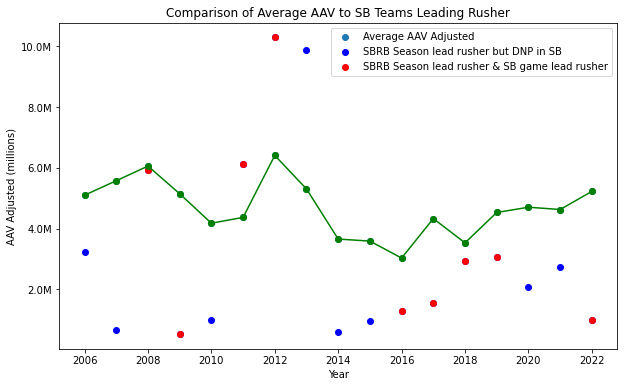

In [58]:
### Pay

df = df[df['AAV Adjusted'] != -1]
df = df[df["Games Played"] > 8]

average_aav = df.groupby('Year')['AAV Adjusted'].mean().reset_index()

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(average_aav['Year'], average_aav['AAV Adjusted'], label='Average AAV Adjusted')
plt.plot(average_aav['Year'], average_aav['AAV Adjusted'], marker='o', linestyle='-', color='g')

    
if not SBRBSNG.empty:
    plt.scatter(SBRBS['Year'], SBRBS['AAV Adjusted'], color='b', label='SBRB Season lead rusher but DNP in SB')
    
if not SBRBG.empty:
    plt.scatter(SBRBG['Year'], SBRBG['AAV Adjusted'], color='r', label='SBRB Season lead rusher & SB game lead rusher')

def millions_formatter(x, pos):
    return f'{x / 1e6:.1f}M'

plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.xlabel('Year')
plt.ylabel('AAV Adjusted (millions)')
plt.title('Comparison of Average AAV to SB Teams Leading Rusher')
plt.legend()
plt.show()

In [53]:
from matplotlib.ticker import FuncFormatter

# Your existing code here

# Calculate the distances
distances = []
for index, row in SBRBS.iterrows():
    year = row['Year']
    league_avg_aav = average_aav[average_aav['Year'] == year]['AAV Adjusted'].values[0]
    sb_team_aav = row['AAV Adjusted']
    distance = abs(league_avg_aav - sb_team_aav)
    distances.append(distance)

# Compute the average distance
average_distance = np.mean(distances)

# Print the direction
if average_distance > 0:
    print(f'On average, the SB Teams Leading Rusher has an AAV Adjusted lower than the League Average.')
elif average_distance < 0:
    print(f'On average, the SB Teams Leading Rusher has an AAV Adjusted higher than the League Average.')
else:
    print(f'The SB Teams Leading Rusher has the same AAV Adjusted as the League Average.')
print(f'Average distance between the points: {abs(average_distance)}')

On average, the SB Teams Leading Rusher has an AAV Adjusted lower than the League Average.
Average distance between the points: 2703211.6748599946


In [59]:
from matplotlib.ticker import FuncFormatter

# Your existing code here

# Calculate the distances
distances = []
for index, row in SBRBG.iterrows():
    year = row['Year']
    league_avg_aav = average_aav[average_aav['Year'] == year]['AAV Adjusted'].values[0]
    sb_team_aav = row['AAV Adjusted']
    distance = abs(league_avg_aav - sb_team_aav)
    distances.append(distance)

# Compute the average distance
average_distance = np.mean(distances)

# Print the direction
if average_distance > 0:
    print(f'On average, the SB Teams Game Leading Rusher has an AAV Adjusted lower than the League Average.')
elif average_distance < 0:
    print(f'On average, the SB Teams Game Leading Rusher has an AAV Adjusted higher than the League Average.')
else:
    print(f'The SB Teams Game Leading Rusher has the same AAV Adjusted as the League Average.')
print(f'Average distance between the points: {abs(average_distance)}')

On average, the SB Teams Game Leading Rusher has an AAV Adjusted lower than the League Average.
Average distance between the points: 2360231.94566115


In [60]:
from matplotlib.ticker import FuncFormatter

# Your existing code here

# Calculate the distances
distances = []
for index, row in SBRBSNG.iterrows():
    year = row['Year']
    league_avg_aav = average_aav[average_aav['Year'] == year]['AAV Adjusted'].values[0]
    sb_team_aav = row['AAV Adjusted']
    distance = abs(league_avg_aav - sb_team_aav)
    distances.append(distance)

# Compute the average distance
average_distance = np.mean(distances)

# Print the direction
if average_distance > 0:
    print(f'On average, the SB Teams Leading Rusher that DNP in SB has an AAV Adjusted lower than the League Average.')
elif average_distance < 0:
    print(f'On average, the SB Teams Leading Rusher that DNP in SB has an AAV Adjusted higher than the League Average.')
else:
    print(f'The SB Teams Leading Rusher that DNP in SB has the same AAV Adjusted as the League Average.')
print(f'Average distance between the points: {abs(average_distance)}')

On average, the SB Teams Leading Rusher that DNP in SB has an AAV Adjusted lower than the League Average.
Average distance between the points: 2910301.5706992135
